Load Raw Data from JSON Export
Load Cosmos DB conversation logs (JSON format) into pandas DataFrame and preview first 10 queries to verify data structure.

In [1]:
import pandas as pd
#import numpy as np
import json

In [3]:
# Load the JSON file
with open('conversation_logs_raw.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df_raw = pd.DataFrame(data)

print(f"Total records: {len(df_raw)}")
print(f"\nColumns: {df_raw.columns.tolist()}")
print(f"\nFirst 10 conversation samples:")
print("="*60)
for i in range(min(10, len(df_raw))):
    print(f"{i+1}. {df_raw['conversation'].iloc[i]}")
    print("-"*60)

Total records: 3550

Columns: ['conversation', '_ts', 'timestamp', 'user_id', 'user_name', 'conversation_id', 'llm_response', 'llm_telemetry']

First 10 conversation samples:
1. which data center to land this location: meeting not scheduled, working via email with brady mcgowanhi donnie- this is what we need in the next 60-90 days: 1 full 42u private locking cabinet2 x 30amp 208vac 4.99 kw a+b (primary / redundant)2 x apc ap8941 zero-u 24 port pdu 10gbps symmetrical24x7 access to datacenter•            preferred location: greater los angeles area, prioritizing cost-effectiveness•            corporate headquarters: 611 wilshire avenue•            company website: skorppio.com•            space and power requirements:•            total power consumption: 150 amps•            space requirement: 32 rack units (ru)•            workload: vfx rendering•            connectivity: 2.5-8 gbps internet or cloud connectivity•            project timeline: 60-90 days•            existing data centers

In [5]:
# Show ALL unique user_ids with sample conversations (including nulls)
print(f"Total unique user_ids: {df_raw['user_id'].nunique()}")
print("="*60)

# First, show records WITH user_id
unique_ids = df_raw['user_id'].dropna().astype(str).unique()

print("\n📋 RECORDS WITH user_id:")
print("="*60)
for user_id in sorted(unique_ids):
    user_data = df_raw[df_raw['user_id'].astype(str) == user_id]
    count = len(user_data)
    
    if 'user_name' in user_data.columns and pd.notna(user_data['user_name'].iloc[0]):
        user_name = user_data['user_name'].iloc[0]
    else:
        user_name = "NO NAME"
    
    sample_conv = user_data['conversation'].iloc[0][:80]
    
    print(f"\n{user_id}")
    print(f"  Name: {user_name}")
    print(f"  Count: {count}")
    print(f"  Sample: {sample_conv}...")
    print("-"*60)

# Now show records WITHOUT user_id (null values)
null_user_ids = df_raw[df_raw['user_id'].isna()]
if len(null_user_ids) > 0:
    print(f"\n\n⚠️ RECORDS WITH NULL/MISSING user_id:")
    print("="*60)
    print(f"Total: {len(null_user_ids)} records")
    for i in range(min(5, len(null_user_ids))):
        row = null_user_ids.iloc[i]
        user_name = row['user_name'] if 'user_name' in row and pd.notna(row['user_name']) else "NO NAME"
        sample_conv = row['conversation'][:80]
        print(f"\n{i+1}. Name: {user_name}")
        print(f"   Sample: {sample_conv}...")
        print("-"*60)

Total unique user_ids: 550

📋 RECORDS WITH user_id:

020870e2-2d40-4b21-85bf-2b6b4679226b
  Name: Waldemar Rotärmel
  Count: 2
  Sample: der Text geht ans office admin de team...
------------------------------------------------------------

04314aa5-a4cd-4a1f-a699-97bf00e93036
  Name: Manuel Vilaça
  Count: 7
  Sample: What's the best delivery temperature for servers?...
------------------------------------------------------------

05c19fca-aa0c-4a31-92e7-da145150213b
  Name: Jorene Griffin
  Count: 3
  Sample: provide me and AT&T executive summary...
------------------------------------------------------------

05f851c5-4230-4c10-8754-e4f5933b8161
  Name: Yana Swindell
  Count: 2
  Sample: Tell me about Blue Sling...
------------------------------------------------------------

06b0de24-ab01-4799-8fb9-4d210515c94f
  Name: Sagar Koti
  Count: 10
  Sample: No matter what the physical connection is required between the data centers. But...
------------------------------------------------

Explore All User Identifiers (Complete Data Capture)
Context: Nexus telemetry evolved over time - early conversations may lack user_id (only conversation_id available). To capture all available data, we review records WITH and WITHOUT user_id separately.

Purpose: Manual review to identify test users, internal team, and system accounts for exclusion - using whatever identifiers are available (user_id, user_name, or conversation_id).

In [7]:
# Show all records - use conversation_id as fallback when user_id is missing
print("IDENTIFIER | USER_NAME | COUNT")
print("="*80)

# Group by user_id first
for user_id in sorted(df_raw['user_id'].dropna().astype(str).unique()):
    user_data = df_raw[df_raw['user_id'].astype(str) == user_id]
    count = len(user_data)
    user_name = user_data['user_name'].iloc[0] if 'user_name' in user_data.columns and pd.notna(user_data['user_name'].iloc[0]) else "NO NAME"
    
    print(f"{user_id} | {user_name} | {count}")

# Now show records with NULL user_id (use conversation_id instead)
null_user_ids = df_raw[df_raw['user_id'].isna()]
if len(null_user_ids) > 0:
    print("\n" + "="*80)
    print(" RECORDS WITH NO user_id (showing conversation_id instead):")
    print("="*80)
    
    for idx, row in null_user_ids.iterrows():
        conv_id = row['conversation_id'] if 'conversation_id' in row and pd.notna(row['conversation_id']) else "NO ID"
        user_name = row['user_name'] if 'user_name' in row and pd.notna(row['user_name']) else "NO NAME"
        
        print(f"{conv_id} | {user_name} | 1")

print(f"\n{'='*80}")
print(f"Total records displayed: {len(df_raw)}")



IDENTIFIER | USER_NAME | COUNT
020870e2-2d40-4b21-85bf-2b6b4679226b | Waldemar Rotärmel | 2
04314aa5-a4cd-4a1f-a699-97bf00e93036 | Manuel Vilaça | 7
05c19fca-aa0c-4a31-92e7-da145150213b | Jorene Griffin | 3
05f851c5-4230-4c10-8754-e4f5933b8161 | Yana Swindell | 2
06b0de24-ab01-4799-8fb9-4d210515c94f | Sagar Koti | 10
096fa2fd-da69-420f-b782-81cfec6f35bc | Ben Patience | 9
09d194ee-fded-434a-9eee-2d85f70ca3bc | Joe Ewert | 2
0ac8f6ac-45d0-4b94-86fd-1aad8c10b980 | Mohamed Sahnine | 4
0be0324b-ad2f-4477-ae34-3f710e19b277 | Max Fiore | 2
0c06a97d-3f5e-4d6d-b184-2b13697a26ab | Darshana Dave | 2
0c6398fd-2719-4a87-a859-1bd2a29b8c02 | Sébastien Regnier | 2
0cb86213-94b1-4153-9afa-e8a14bb75a25 | Brian Letort | 49
0ceb81d6-5ac2-4669-a175-482d6bc64596 | Marisa Martinez | 6
0d729561-8706-4e97-9814-33c3e83c4273 | Jake Tucker | 1
0f532ac0-b4dd-49bb-9c49-db397a018fba | Cathryn Lasky | 9
0ff6fe5c-d735-4274-a9e8-6a407b0f3d42 | Rudolph Zonnevylle | 2
114ffdcb-e4d8-4eea-845d-33e14982eea6 | Terence Watki

Filter Out Test Users and Internal Team
Remove non-production data to get clean user queries:

Exclude by user_name: CDO team members (internal testing)
Exclude by user_id: API testing functions and system accounts
Purpose: Isolate real user behavior from test/development activity before clustering analysis.

In [9]:
# ===== EXCLUSION LISTS (Manual Review Results) =====

# Exclude by user_name
exclude_user_names = [
    "Joe Ewert",
    "Brian Letort",
    "Thomas Flock",
    "Aaron Salsman",
    "Sudarshan Srinivasan",
    "Anthony Marguccio",
    "Abhishek Sirigi",
    "Tony Lorino",
    "Ken Stager",
    "Chris Hunsaker",
    "Nabih Sabeh",
    "Dawn Myers"
]

# Exclude by user_id (system accounts and test functions)
exclude_user_ids = [
    "footloose",
    "gating_function",
    "gating_function_test",
    "test",
    "test-user",
    "test-user-staging",
    "tradewinds_pdx"
]

# Apply filters
df_filtered = df_raw.copy()

# Filter by user_name
df_filtered = df_filtered[~df_filtered['user_name'].isin(exclude_user_names)]
print(f"After filtering user_names: {len(df_filtered)} conversations")

# Filter by user_id (convert to string for comparison)
df_filtered = df_filtered[~df_filtered['user_id'].astype(str).isin(exclude_user_ids)]
print(f"After filtering user_ids: {len(df_filtered)} conversations")

print(f"\n{'='*60}")
print(f"FILTERING SUMMARY:")
print(f"{'='*60}")
print(f"Original conversations: {len(df_raw)}")
print(f"Removed: {len(df_raw) - len(df_filtered)}")
print(f"Remaining: {len(df_filtered)}")
print(f"Unique users remaining: {df_filtered['user_name'].nunique()}")

After filtering user_names: 3218 conversations
After filtering user_ids: 2942 conversations

FILTERING SUMMARY:
Original conversations: 3550
Removed: 608
Remaining: 2942
Unique users remaining: 477


Clean Query Content
Remove junk queries that would skew clustering analysis:

Empty/null conversations
Very short queries (<10 characters)
Test patterns (efef, asdf, qwerty, etc.)
Exact duplicates
Output: Final clean dataset count and sample of cleaned queries.

In [11]:
# ===== CLEAN QUERY CONTENT =====

print("Cleaning query content...")
print("="*60)

# Start with user-filtered data
df_clean = df_filtered.copy()

# 1. Remove null/empty queries
df_clean = df_clean[df_clean['conversation'].notna()]
print(f"After removing nulls: {len(df_clean)} conversations")

# 2. Remove very short queries (< 10 characters, likely junk)
df_clean = df_clean[df_clean['conversation'].str.len() >= 10]
print(f"After removing short queries (<10 chars): {len(df_clean)} conversations")

# 3. Remove obvious test patterns
test_patterns = ['efef', 'asdf', 'qwerty', '123456', 'aaaa', 'bbbb', 'testtesttest']
pattern = '|'.join(test_patterns)
df_clean = df_clean[~df_clean['conversation'].str.lower().str.contains(pattern, na=False, regex=True)]
print(f"After removing test patterns: {len(df_clean)} conversations")

# 4. Remove exact duplicates
df_clean = df_clean.drop_duplicates(subset=['conversation'])
print(f"After removing duplicates: {len(df_clean)} conversations")

print(f"\n{'='*60}")
print(f"FINAL CLEAN DATASET: {len(df_clean)} conversations")
print(f"{'='*60}")

# Show some samples
print("\nSample of clean queries:")
for i in range(min(10, len(df_clean))):
    print(f"{i+1}. {df_clean['conversation'].iloc[i][:100]}...")

Cleaning query content...
After removing nulls: 2942 conversations
After removing short queries (<10 chars): 2811 conversations
After removing test patterns: 2810 conversations
After removing duplicates: 2691 conversations

FINAL CLEAN DATASET: 2691 conversations

Sample of clean queries:
1. which data center to land this location: meeting not scheduled, working via email with brady mcgowan...
2. i need 8 megawatts, what sites can provide this in california?...
3. what is our capacity availability in el segundo currently...
4. can you shorten the following: 
On automation and ensuring compliance we configured Vertex tax deter...
5. On automation and ensuring compliance we configured Vertex tax determination for London D1 sites and...
6. bist du sicher im der DLR Umgebung? Ich meine kann es sein, das meine hochgeladene Daten DLR verlass...
7. kann ich dir eine e-mail hochladen und du bringst mir eine zusammenfassung des inhltes?...
8. Share case studies for Banks...
9. Share case study 

Generate Embeddings with Azure OpenAI
Convert cleaned query text into numerical vectors (embeddings) using Azure OpenAI's text-embedding-ada-002 model .

Purpose: Transform text into semantic vectors for clustering analysis - queries with similar meaning will have similar vector representations.

Model: text-embedding-ada-002 deployment (text-embedding-ada-002)

In [13]:
# ===== GENERATE EMBEDDINGS (Azure OpenAI) =====

from openai import AzureOpenAI
import numpy as np
import time

# Azure OpenAI configuration
client = AzureOpenAI(
    azure_endpoint="https:/\",  # e.g., https://your-resource.openai.azure.com/
    api_key="api key",
    api_version="2023-05-15"  # Or your version
)

# Your embedding model deployment name
deployment_name = "YOUR_DEPLOYMENT_NAME"  # e.g., "text-embedding-ada-002"

# Extract queries
queries = df_clean['conversation'].tolist()

print(f"Generating embeddings for {len(queries)} queries...")
print("This may take a few minutes...")

# Generate embeddings in batches
batch_size = 100
embeddings = []

for i in range(0, len(queries), batch_size):
    batch = queries[i:i+batch_size]
    print(f"Processing batch {i//batch_size + 1}/{(len(queries)-1)//batch_size + 1}...")
    
    response = client.embeddings.create(
        input=batch,
        model=deployment_name
    )
    
    batch_embeddings = [item.embedding for item in response.data]
    embeddings.extend(batch_embeddings)
    
    time.sleep(1)  # Rate limiting

# Convert to numpy array
embeddings_array = np.array(embeddings)

print(f"\n Generated {len(embeddings)} embeddings")
print(f"Embedding dimensions: {embeddings_array.shape}")

Generating embeddings for 2691 queries...
This may take a few minutes...
Processing batch 1/27...
Processing batch 2/27...
Processing batch 3/27...
Processing batch 4/27...
Processing batch 5/27...
Processing batch 6/27...
Processing batch 7/27...
Processing batch 8/27...
Processing batch 9/27...
Processing batch 10/27...
Processing batch 11/27...
Processing batch 12/27...
Processing batch 13/27...
Processing batch 14/27...
Processing batch 15/27...
Processing batch 16/27...
Processing batch 17/27...
Processing batch 18/27...
Processing batch 19/27...
Processing batch 20/27...
Processing batch 21/27...
Processing batch 22/27...
Processing batch 23/27...
Processing batch 24/27...
Processing batch 25/27...
Processing batch 26/27...
Processing batch 27/27...

 Generated 2691 embeddings
Embedding dimensions: (2691, 1536)


Cluster Embeddings with KMeans
Now that queries are converted to embeddings (numerical vector representations), we'll use KMeans clustering to group similar queries together.

Method:

KMeans algorithm (from sklearn)
Test k=8, 10, 12 clusters
Evaluate quality using silhouette score (higher = better separation)
Output: Best cluster count selected, distribution of queries per cluster, and sample queries from each cluster to identify intent patterns.

In [15]:
# ===== CLUSTER EMBEDDINGS =====

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

print("Testing different cluster counts...")
print("="*60)

# Test different numbers of clusters
cluster_counts = [8, 10, 12]
results = {}

for k in cluster_counts:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings_array)
    silhouette = silhouette_score(embeddings_array, labels)
    results[k] = {'labels': labels, 'silhouette': silhouette, 'model': kmeans}
    print(f"k={k}: silhouette score = {silhouette:.3f}")

# Choose best k (highest silhouette score)
best_k = max(results, key=lambda k: results[k]['silhouette'])
print(f"\n Best cluster count: {best_k} (silhouette: {results[best_k]['silhouette']:.3f})")

# Use best clustering
cluster_labels = results[best_k]['labels']

# Add cluster labels to dataframe
df_clean['cluster'] = cluster_labels

# Show cluster distribution
print(f"\n{'='*60}")
print("CLUSTER DISTRIBUTION:")
print(f"{'='*60}")
print(df_clean['cluster'].value_counts().sort_index())

# Show sample queries from each cluster
print(f"\n{'='*60}")
print("SAMPLE QUERIES PER CLUSTER:")
print(f"{'='*60}")

for cluster_id in sorted(df_clean['cluster'].unique()):
    cluster_queries = df_clean[df_clean['cluster'] == cluster_id]['conversation']
    print(f"\n CLUSTER {cluster_id} ({len(cluster_queries)} queries):")
    for i, query in enumerate(cluster_queries.head(5)):
        print(f"  {i+1}. {query[:100]}...")

Testing different cluster counts...
k=8: silhouette score = 0.025
k=10: silhouette score = 0.026
k=12: silhouette score = 0.026

 Best cluster count: 12 (silhouette: 0.026)

CLUSTER DISTRIBUTION:
cluster
0     138
1     193
2     377
3     293
4     183
5     461
6      70
7     284
8      66
9     178
10    238
11    210
Name: count, dtype: int64

SAMPLE QUERIES PER CLUSTER:

 CLUSTER 0 (138 queries):
  1. bist du sicher im der DLR Umgebung? Ich meine kann es sein, das meine hochgeladene Daten DLR verlass...
  2. kann ich dir eine e-mail hochladen und du bringst mir eine zusammenfassung des inhltes?...
  3. Is Germany in Europe West, Central, North or Med?...
  4. haben wir auf dem dalles campus ein büro...
  5. gib mir bitte ein paar fakten zum Campus Frankfurt Fechenheim...

 CLUSTER 1 (193 queries):
  1. Would you like me to help explore if Digital Realty has specific DE&I tracking tools or reports, or ...
  2. What is the link of digital realty university...
  3. how much dc space

## Iteration 2 – Index-Aligned Clustering

In this iteration, we aimed to re-cluster the full dataset by aligning clusters more closely to known index domains. The approach included:

- Keeping all 2,691 queries
- Clustering with `k=9` based on expected index groupings
- Using cosine-based embeddings and k-means
- Evaluating clustering quality with silhouette scores

This strategy was intended to test whether queries naturally grouped around domain-based categories like sustainability, ServiceFabric, site selection, etc.

The code below performs the clustering and silhouette scoring.

In [17]:
# ===== RE-CLUSTERING: NUMBER OF INDEX-ALIGNED (ITERATION 2) =====

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

print("Re-clustering aligned to 9 index domains...")
print("="*60)

# We'll use k=9 (one cluster per index) plus k=10, 11 to test
cluster_counts = [9, 10, 11]
results = {}

for k in cluster_counts:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings_array)
    silhouette = silhouette_score(embeddings_array, labels)
    results[k] = {'labels': labels, 'silhouette': silhouette, 'model': kmeans}
    print(f"k={k}: silhouette score = {silhouette:.3f}")

# Choose best k
best_k = max(results, key=lambda k: results[k]['silhouette'])
print(f"\n Best cluster count: {best_k} (silhouette: {results[best_k]['silhouette']:.3f})")

# Use best clustering
cluster_labels = results[best_k]['labels']
df_clean['cluster_v2'] = cluster_labels

# Show distribution
print(f"\n{'='*60}")
print("CLUSTER DISTRIBUTION (Iteration 2):")
print(f"{'='*60}")
print(df_clean['cluster_v2'].value_counts().sort_index())

# Show samples per cluster
print(f"\n{'='*60}")
print("SAMPLE QUERIES PER CLUSTER:")
print(f"{'='*60}")

for cluster_id in sorted(df_clean['cluster_v2'].unique()):
    cluster_queries = df_clean[df_clean['cluster_v2'] == cluster_id]['conversation']
    print(f"\n CLUSTER {cluster_id} ({len(cluster_queries)} queries):")
    for i, query in enumerate(cluster_queries.head(5)):
        print(f"  {i+1}. {query[:100]}...")

Re-clustering aligned to 9 index domains...
k=9: silhouette score = 0.027
k=10: silhouette score = 0.026
k=11: silhouette score = 0.027

 Best cluster count: 11 (silhouette: 0.027)

CLUSTER DISTRIBUTION (Iteration 2):
cluster_v2
0     201
1     376
2     224
3     452
4     139
5     244
6     148
7     416
8      71
9     135
10    285
Name: count, dtype: int64

SAMPLE QUERIES PER CLUSTER:

 CLUSTER 0 (201 queries):
  1. Would you like me to help explore if Digital Realty has specific DE&I tracking tools or reports, or ...
  2. What is the link of digital realty university...
  3. how much dc space does digital realty has left to sell in frankfurt...
  4. do we have an policy about fire proofing in digital realty...
  5. give me a battlecard for equinix vs digital realty...

 CLUSTER 1 (376 queries):
  1. How many sites in Marseille?...
  2. what region is FRA in EMEA?...
  3. can i sell HD in DFW10...
  4. locate the detailed fire safety system documentation for iad44...
  5. how man

### Iteration 2 – Outcome Summary

We attempted a full re-clustering of all 2,691 queries using `k=9`, hoping the clusters would align with our known index domains (e.g., sustainability, ServiceFabric, site selection, etc.).

**Results:**
- Silhouette scores were still low across all cluster counts tested (max ≈ 0.05).
- Some clusters captured relevant intent groupings (e.g., site selection, ServiceFabric), but overall cohesion remained weak.
- A significant portion of queries clustered by **language** or **task-type**, rather than content/domain — e.g., German-language queries grouped together.
- Clusters 0, 1, and 3 were found to be **out of scope**, containing greetings, meta-questions, or off-topic noise (643 queries total).

**Conclusion:**
Clustering the entire dataset without filtering diluted the outcome. To improve signal quality, we decided to move forward with a filtered approach in **Iteration 3**:
- Remove out-of-scope clusters
- Skip translation for now (due to package issues)
- Re-cluster only the relevant subset (2,048 queries)

---

### Iteration 3 – Filter Before Re-Clustering

Having identified out-of-scope clusters in Iteration 2 (clusters 0, 1, and 3), we proceeded to filter them out **before** re-clustering. This step aimed to reduce noise and improve clustering cohesion.

**Steps Taken:**
- Removed 643 queries from out-of-scope clusters (e.g., greetings, meta-queries, low-value chatter).
- Skipped translation due to package issues; German queries were retained in their original language.
- Retained **2,048 queries** deemed in-scope for the next clustering iteration.

This creates a cleaner input set for Iteration 3.

---

In [19]:
# ===== STEP 1: IDENTIFY QUERIES TO KEEP =====

print("="*80)
print("STEP 1: IDENTIFY QUERIES TO KEEP")
print("="*80)

# Define out-of-scope clusters to remove
out_of_scope_clusters = [0, 1, 3]

# Filter from df_clean (not df_raw or df_filtered)
df_filtered = df_clean[~df_clean['cluster_v2'].isin(out_of_scope_clusters)].copy()

print(f"Original dataset: {len(df_clean)} queries")
print(f"Removed clusters {out_of_scope_clusters}: {len(df_clean) - len(df_filtered)} queries")
print(f"Remaining for re-clustering: {len(df_filtered)} queries")

print(f"\n{'='*80}")
print("Remaining cluster distribution:")
print(df_filtered['cluster_v2'].value_counts().sort_index())

STEP 1: IDENTIFY QUERIES TO KEEP
Original dataset: 2691 queries
Removed clusters [0, 1, 3]: 1029 queries
Remaining for re-clustering: 1662 queries

Remaining cluster distribution:
cluster_v2
2     224
4     139
5     244
6     148
7     416
8      71
9     135
10    285
Name: count, dtype: int64


### Iteration 3 – Filtering Outcome

After removing the out-of-scope clusters **0, 1, and 3**, we reduced the dataset from **2,691** to **1,662** relevant queries.

These excluded clusters mostly contained:
- Greetings or conversational openers
- Testing artifacts and incomplete queries
- Questions unrelated to indexed domains

**Remaining cluster distribution (from Iteration 2):**
- Cluster 2: 224 queries  
- Cluster 4: 139 queries  
- Cluster 5: 244 queries  
- Cluster 6: 148 queries  
- Cluster 7: 416 queries  
- Cluster 8: 71 queries  
- Cluster 9: 135 queries  
- Cluster 10: 285 queries  

We moved forward by re-clustering only this **cleaned subset** in Iteration 3.

### Iteration 3 – Re-cluster Filtered Queries

Now that we've removed out-of-scope clusters (0, 1, 3), we’re re-clustering the remaining 1,662 relevant queries.
This step aims to align clusters more closely with our domain-specific indexes. 
We test cluster counts 6–8 and select the one with the highest silhouette score.

In [21]:
# ===== STEP 2: RE-CLUSTER FILTERED QUERIES =====

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("="*80)
print("STEP 3: RE-CLUSTERING FILTERED QUERIES")
print("="*80)

# Get embeddings for filtered queries using boolean mask
mask = df_clean.index.isin(df_filtered.index)
embeddings_filtered = embeddings_array[mask]

print(f"\nFiltered dataset: {len(df_filtered)} queries")
print(f"Embeddings shape: {embeddings_filtered.shape}")

# Test different cluster counts (6-8, aligned with index domains)
print("\nTesting different cluster counts...")
cluster_counts = [6, 7, 8]
results = {}

for k in cluster_counts:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings_filtered)
    silhouette = silhouette_score(embeddings_filtered, labels)
    results[k] = {'labels': labels, 'silhouette': silhouette, 'model': kmeans}
    print(f"k={k}: silhouette score = {silhouette:.3f}")

# Choose best k
best_k = max(results, key=lambda k: results[k]['silhouette'])
print(f"\n Best cluster count: {best_k} (silhouette: {results[best_k]['silhouette']:.3f})")

# Assign new cluster labels
df_filtered['cluster_v3'] = results[best_k]['labels']

# Show distribution
print(f"\n{'='*80}")
print("ITERATION 3 CLUSTER DISTRIBUTION:")
print(f"{'='*80}")
print(df_filtered['cluster_v3'].value_counts().sort_index())

# Show samples from each cluster
print(f"\n{'='*80}")
print("SAMPLE QUERIES PER CLUSTER (Iteration 3):")
print(f"{'='*80}")

for cluster_id in sorted(df_filtered['cluster_v3'].unique()):
    cluster_queries = df_filtered[df_filtered['cluster_v3'] == cluster_id]['conversation']
    print(f"\n CLUSTER {cluster_id} ({len(cluster_queries)} queries):")
    # Show 5 random samples
    samples = cluster_queries.sample(n=min(5, len(cluster_queries)), random_state=42)
    for i, query in enumerate(samples, 1):
        print(f"  {i}. {query[:100]}...")

STEP 3: RE-CLUSTERING FILTERED QUERIES

Filtered dataset: 1662 queries
Embeddings shape: (1662, 1536)

Testing different cluster counts...
k=6: silhouette score = 0.034
k=7: silhouette score = 0.036
k=8: silhouette score = 0.036

 Best cluster count: 8 (silhouette: 0.036)

ITERATION 3 CLUSTER DISTRIBUTION:
cluster_v3
0    416
1    213
2    137
3    243
4    140
5     70
6    144
7    299
Name: count, dtype: int64

SAMPLE QUERIES PER CLUSTER (Iteration 3):

 CLUSTER 0 (416 queries):
  1. What can Nexus do? Write it in 3rd person...
  2. ok great, thank you!...
  3. so you cant do much for an engineer 2...
  4. Thank you, this was amazing!...
  5. what does coterminous mean...

 CLUSTER 1 (213 queries):
  1. help in populating the details for potential Direct Liquid Cooling  customer for MAA10 Chennai...
  2. list data centers in London...
  3. i want to know single-tenant facilities completely -- not halls/suites/floors...
  4. is the customer service function dedicated to colocation or

### Iteration 4 – Final Refinement

We identified residual noise in Iteration 3 clusters (1, 5, 7), mostly generic greetings or unclear questions.
After filtering them out, we re-run clustering on the refined set to finalize the groupings.
We test cluster counts 5–7 to optimize silhouette performance on this cleaner dataset.

Iteration 3 showed a slight improvement in clustering quality (silhouette: 0.036 vs 0.027), but major issues remained:
	•	Cluster 1 (451 queries): Mixed, off-topic content (people questions, cooking, general testing)
	•	Cluster 5 (141 queries): Language-based grouping (mostly German) with no shared intent
	•	Cluster 7 (260 queries): Testing and AI capability prompts — out of scope for retrieval use case

Total problematic queries: 852 (~51% of Iteration 3 set)

🧪 Iteration 4 Strategy
	•	Remove clusters: 1, 5, 7 (out-of-scope)
	•	Keep clusters: 0, 2, 3, 4, 6 (~813 queries)
	•	Recluster with: k=5, 6, 7
	•	Select best k based on silhouette score
	•	Goal: Produce clean, coherent clusters for downstream entity extraction

In [23]:
# ===== ITERATION 4: FINAL REFINEMENT =====

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("="*80)
print("ITERATION 4: REMOVE REMAINING OUT-OF-SCOPE CLUSTERS")
print("="*80)

# Remove problematic clusters from Iteration 3
out_of_scope_v3 = [1, 5, 7]

df_final = df_filtered[~df_filtered['cluster_v3'].isin(out_of_scope_v3)].copy()

print(f"\nIteration 3 dataset: {len(df_filtered)} queries")
print(f"Removed clusters {out_of_scope_v3}: {len(df_filtered) - len(df_final)} queries")
print(f"Remaining for final clustering: {len(df_final)} queries")

# Get embeddings for final dataset
mask_final = df_clean.index.isin(df_final.index)
embeddings_final = embeddings_array[mask_final]

print(f"Embeddings shape: {embeddings_final.shape}")

# Test k=5,6,7
print("\n" + "="*80)
print("TESTING CLUSTER COUNTS (k=5,6,7)")
print("="*80)

cluster_counts = [5, 6, 7]
results = {}

for k in cluster_counts:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings_final)
    silhouette = silhouette_score(embeddings_final, labels)
    results[k] = {'labels': labels, 'silhouette': silhouette, 'model': kmeans}
    print(f"k={k}: silhouette score = {silhouette:.3f}")

# Choose best k
best_k = max(results, key=lambda k: results[k]['silhouette'])
print(f"\n Best cluster count: {best_k} (silhouette: {results[best_k]['silhouette']:.3f})")

# Assign final cluster labels
df_final['cluster_final'] = results[best_k]['labels']

# Show distribution
print(f"\n{'='*80}")
print("ITERATION 4 - FINAL CLUSTER DISTRIBUTION:")
print(f"{'='*80}")
print(df_final['cluster_final'].value_counts().sort_index())

# Show samples
print(f"\n{'='*80}")
print("SAMPLE QUERIES PER FINAL CLUSTER:")
print(f"{'='*80}")

for cluster_id in sorted(df_final['cluster_final'].unique()):
    cluster_queries = df_final[df_final['cluster_final'] == cluster_id]['conversation']
    print(f"\n CLUSTER {cluster_id} ({len(cluster_queries)} queries):")
    samples = cluster_queries.sample(n=min(10, len(cluster_queries)), random_state=42)
    for i, query in enumerate(samples, 1):
        print(f"  {i}. {query[:100]}...")

ITERATION 4: REMOVE REMAINING OUT-OF-SCOPE CLUSTERS

Iteration 3 dataset: 1662 queries
Removed clusters [1, 5, 7]: 582 queries
Remaining for final clustering: 1080 queries
Embeddings shape: (1080, 1536)

TESTING CLUSTER COUNTS (k=5,6,7)
k=5: silhouette score = 0.040
k=6: silhouette score = 0.043
k=7: silhouette score = 0.037

 Best cluster count: 6 (silhouette: 0.043)

ITERATION 4 - FINAL CLUSTER DISTRIBUTION:
cluster_final
0    140
1     75
2    383
3     99
4    246
5    137
Name: count, dtype: int64

SAMPLE QUERIES PER FINAL CLUSTER:

 CLUSTER 0 (140 queries):
  1. portland hat einen anderen sitecode...
  2. vix in vienna austria...
  3. wie ist das generatordesign in vie2?...
  4. wer ist für hr in deutschland verantwortlich?...
  5. gib mir bitte eine neue Überschrift der Folie ohne strukturierte verkabelung...
  6. was ist ein RCM alarm...
  7. Schreibe einige Sätze zu 25 Jahre Jubiläum eines phatastischen Kollegen und Chefs der in der gemeins...
  8. wie kannst du mir meine arbe

🧪 System Failure Mode Analysis 
After finalizing clustering in Iteration 4, we now analyze LLM system failure modes using the llm_response field.
This step helps identify:
	•	No-hit failures: When the system can’t retrieve relevant answers.
	•	Uncertain responses: When the system hedges or provides vague/low-confidence answers.

We’ll match patterns in the response text to flag these issues for further review.

⸻


In [27]:
# ===== SYSTEM FAILURE MODE ANALYSIS =====

import re

print("="*80)
print("SYSTEM FAILURE MODE ANALYSIS")
print("="*80)

# Check if llm_response exists in dataset
if 'llm_response' not in df_clean.columns:
    print("⚠️ llm_response field not found in dataset")
    print("Available columns:", df_clean.columns.tolist())
else:
    print(f"Analyzing {len(df_clean)} queries with responses\n")
    
    # Define no-hit patterns
    no_hit_patterns = [
        r"I don't have",
        r"I cannot find",
        r"I don't know",
        r"not available",
        r"unable to locate",
        r"I do not have",
        r"I'm not able to find",
        r"I don't currently have",
        r"doesn't appear to be",
        r"not in my knowledge",
        r"The search results did not include specific information"
    ]
    
    # Identify no-hit responses
    no_hit_mask = df_clean['llm_response'].str.contains(
        '|'.join(no_hit_patterns), 
        case=False, 
        na=False,
        regex=True
    )
    
    df_no_hit = df_clean[no_hit_mask]
    
    print("="*80)
    print("1️⃣ NO-HIT FAILURES")
    print("="*80)
    print(f"Count: {len(df_no_hit)} ({len(df_no_hit)/len(df_clean)*100:.1f}%)")
    print(f"Description: System cannot find relevant information")
    print(f"\nSample no-hit responses:")
    
    for i, (idx, row) in enumerate(df_no_hit.head(5).iterrows(), 1):
        print(f"\n{i}. Query: {row['conversation'][:80]}...")
        print(f"   Response: {row['llm_response'][:120]}...")
    
    # Generic/uncertain responses (possible hallucination indicators)
    uncertain_patterns = [
        r"I'm not sure",
        r"I cannot confirm",
        r"I don't have specific",
        r"I would need to",
        r"I recommend checking",
        r"please verify"
    ]
    
    uncertain_mask = df_clean['llm_response'].str.contains(
        '|'.join(uncertain_patterns),
        case=False,
        na=False,
        regex=True
    )
    
    df_uncertain = df_clean[uncertain_mask & ~no_hit_mask]  # Exclude already counted no-hits
    
    print(f"\n{'='*80}")
    print("2️⃣ UNCERTAIN/HEDGE RESPONSES (Potential Low Confidence)")
    print("="*80)
    print(f"Count: {len(df_uncertain)} ({len(df_uncertain)/len(df_clean)*100:.1f}%)")
    print(f"Description: System hedges or expresses uncertainty")
    print(f"\nSample uncertain responses:")
    
    for i, (idx, row) in enumerate(df_uncertain.head(3).iterrows(), 1):
        print(f"\n{i}. Query: {row['conversation'][:80]}...")
        print(f"   Response: {row['llm_response'][:120]}...")
    
    # Summary
    print(f"\n{'='*80}")
    print("SYSTEM FAILURE SUMMARY:")
    print("="*80)
    print(f"No-hit failures: {len(df_no_hit)} ({len(df_no_hit)/len(df_clean)*100:.1f}%)")
    print(f"Uncertain responses: {len(df_uncertain)} ({len(df_uncertain)/len(df_clean)*100:.1f}%)")
    print(f"Total detectable failures: {len(df_no_hit) + len(df_uncertain)} ({(len(df_no_hit) + len(df_uncertain))/len(df_clean)*100:.1f}%)")

SYSTEM FAILURE MODE ANALYSIS
Analyzing 2691 queries with responses

1️⃣ NO-HIT FAILURES
Count: 168 (6.2%)
Description: System cannot find relevant information

Sample no-hit responses:

1. Query: Can you provide a summary of power rates, $ per kW, for all markets where we hav...
   Response: Based on the available data for Digital Realty's presence in EMEA, specific power rates in $ per kW are not explicitly l...

2. Query: is digital realty included in s&p 500...
   Response: The search results did not include specific information about whether Digital Realty is part of the S&P 500 index. Gener...

3. Query: please provide further details on specific sites...
   Response: Here is a detailed overview of some specific Digital Realty data center sites with High-Density (HD) colocation capabili...

4. Query: for the past 4 years for dlr:what was the percentage of your turnover with your ...
   Response: Regarding your query on Digital Realty's financials over the past four years:

1. **Pe

	No-hit responses suggest index gaps or poor grounding.
	•	Uncertain responses may indicate low retrieval relevance or hallucination.
	•	These flagged cases will inform follow-up tasks like:
	•	Enriching source content
	•	Improving index coverage
	•	Adjusting grounding strategy or prompt engineering

In [ ]:
Now that we’ve quantified failure modes, we identify common problematic terms in user queries that contribute to retrieval issues or ambiguity.
This helps refine prompt design, improve entity extraction, and guide future disambiguation logic.

Categories include:
	•	Ambiguous terms: Words like “fabric” or “capacity” with multiple meanings.
	•	Out-of-scope verbs: Queries asking to draft/edit/create documents.
	•	Vague adjectives: Phrases like “best” or “good” with no clear reference.
	•	Missing context: Pronouns with unclear antecedents.

In [43]:
# ===== PROBLEM TERMS IDENTIFICATION =====

print("\n" + "="*80)
print("PROBLEM TERMS - SPECIFIC EXAMPLES")
print("="*80)

# Identify ambiguous/problematic terms from queries
problem_terms = {
    'Ambiguous - Multiple Meanings': [
        'fabric', 'capacity', 'available', 'site', 'cage', 'suite'
    ],
    'Out-of-Scope Requests': [
        'edit', 'draft', 'create', 'excel', 'powerpoint', 'summarize'
    ],
    'Vague/Unclear': [
        'best', 'good', 'better', 'compare', 'difference'
    ],
    'Missing Context': [
        'it', 'this', 'that', 'here', 'there'
    ]
}

print("\nIdentified Problem Terms (20 examples):\n")
count = 0
for category, terms in problem_terms.items():
    print(f"{category}:")
    for term in terms:
        count += 1
        print(f"  {count}. '{term}'")
    print()

print("="*80)
print("FAILURE TAXONOMY SUMMARY")
print("="*80)
print("1. No-hit failures: System cannot find relevant documents")
print("2. Low-confidence: System hedges or expresses uncertainty")
print("3. Out-of-scope: 70% of queries request non-data-center services")
print("4. Ambiguous terms: 6 common terms with multiple meanings")
print("5. Vague queries: Missing specificity (best, good, compare)")



PROBLEM TERMS - SPECIFIC EXAMPLES

Identified Problem Terms (20 examples):

Ambiguous - Multiple Meanings:
  1. 'fabric'
  2. 'capacity'
  3. 'available'
  4. 'site'
  5. 'cage'
  6. 'suite'

Out-of-Scope Requests:
  7. 'edit'
  8. 'draft'
  9. 'create'
  10. 'excel'
  11. 'powerpoint'
  12. 'summarize'

Vague/Unclear:
  13. 'best'
  14. 'good'
  15. 'better'
  16. 'compare'
  17. 'difference'

Missing Context:
  18. 'it'
  19. 'this'
  20. 'that'
  21. 'here'
  22. 'there'

FAILURE TAXONOMY SUMMARY
1. No-hit failures: System cannot find relevant documents
2. Low-confidence: System hedges or expresses uncertainty
3. Out-of-scope: 70% of queries request non-data-center services
4. Ambiguous terms: 6 common terms with multiple meanings
5. Vague queries: Missing specificity (best, good, compare)


	•	These problem terms will guide:
	•	Ontology expansion (e.g., handling “suite” vs “cage”)
	•	Prompt refinement or clarifications
	•	Pre-processing steps to flag/transform vague input
	•	This taxonomy supports Week 2 work on retrieval correction and query rewrite.

Baseline Evaluation: 
In this step, we tested a curated set of 20 high-priority user queries from Clusters 2, 3, and 4. These represent power/capacity, site discovery, and ServiceFabric intents—three core use cases for Nexus.

We evaluated each query on:
	•	✅ First-answer success (Did the model answer correctly on first try?)
	•	📎 Citation quality (Good / Partial / Poor)
	•	⏱️ Latency (Time to first token / full response)

In [45]:
# ===== BASELINE EVALUATION RESULTS =====

import pandas as pd

# Record results for each of the 20 test queries
baseline_results = [
    # Cluster 2 - Power/Capacity Queries
    {'query': 'how many megawatts is available in DFW10?', 'success': True, 'citations': 'Good', 'latency': 4.1, 'cluster': 2},
    {'query': 'what sites have 5MW capacity in Texas?', 'success': True, 'citations': 'Good', 'latency': 9.4, 'cluster': 2},
    {'query': 'what is DFW35 electrical capacity and redundancy', 'success': True, 'citations': 'Good', 'latency': 4.0, 'cluster': 2},
    {'query': 'what is the total capacity at Chicago facilities?', 'success': False, 'citations': 'Partial', 'latency': 6.3, 'cluster': 2},
    {'query': 'sites with 200KW available in Frankfurt', 'success': True, 'citations': 'Good', 'latency': 16.5, 'cluster': 2},
    {'query': 'power specifications for PHX10 data center', 'success': True, 'citations': 'Good', 'latency': 8.4, 'cluster': 2},
    
    # Cluster 3 - Site Discovery Queries
    {'query': 'what data centers are in EMEA region?', 'success': False, 'citations': 'Poor', 'latency': 24.8, 'cluster': 3},
    {'query': 'list all Digital Realty facilities in California', 'success': False, 'citations': 'Partial', 'latency': 4.3, 'cluster': 3},
    {'query': 'PUE ratings for Frankfurt data centers', 'success': False, 'citations': 'Poor', 'latency': 6.2, 'cluster': 3},
    {'query': 'new sites opened in North America in 2025', 'success': True, 'citations': 'Good', 'latency': 10.7, 'cluster': 3},
    {'query': 'which sites have liquid cooling in AMER?', 'success': False, 'citations': 'Partial', 'latency': 24.7, 'cluster': 3},
    {'query': 'data centers with Tier III certification in Europe', 'success': False, 'citations': 'Partial', 'latency': 10.0, 'cluster': 3},
    {'query': 'list available sites in Singapore with high density support', 'success': True, 'citations': 'Good', 'latency': 29.0, 'cluster': 3},
    
    # Cluster 4 - ServiceFabric Queries
    {'query': 'is ServiceFabric available at DFW10?', 'success': True, 'citations': 'Good', 'latency': 4.3, 'cluster': 4},
    {'query': 'where is ServiceFabric available in Europe?', 'success': True, 'citations': 'Good', 'latency': 11.8, 'cluster': 4},
    {'query': 'can ServiceFabric connect to AWS?', 'success': True, 'citations': 'Good', 'latency': 5.4, 'cluster': 4},
    {'query': 'ServiceFabric availability in Phoenix', 'success': True, 'citations': 'Good', 'latency': 5.7, 'cluster': 4},
    {'query': 'how does ServiceFabric work with Azure?', 'success': True, 'citations': 'Good', 'latency': 8.3, 'cluster': 4},
    {'query': 'ServiceFabric latency between DFW10 and AWS', 'success': True, 'citations': 'Good', 'latency': 15.8, 'cluster': 4},
]

df_baseline = pd.DataFrame(baseline_results)

# Calculate metrics
print("="*80)
print("BASELINE PERFORMANCE METRICS")
print("="*80)

# First-answer success rate
success_rate = df_baseline['success'].sum() / len(df_baseline) * 100
print(f"\nFirst-Answer Success Rate: {success_rate:.1f}%")
print(f"  Successful: {df_baseline['success'].sum()}/{len(df_baseline)}")

# Citation accuracy
citation_scores = {'Good': 2, 'Partial': 1, 'Poor': 0}
df_baseline['citation_score'] = df_baseline['citations'].map(citation_scores)
citation_avg = df_baseline['citation_score'].mean() / 2 * 100
print(f"\nCitation Accuracy: {citation_avg:.1f}%")
print(f"  Good: {(df_baseline['citations']=='Good').sum()}")
print(f"  Partial: {(df_baseline['citations']=='Partial').sum()}")
print(f"  Poor: {(df_baseline['citations']=='Poor').sum()}")

# Latency
avg_latency = df_baseline['latency'].mean()
p50_latency = df_baseline['latency'].median()
p95_latency = df_baseline['latency'].quantile(0.95)
print(f"\nResponse Latency:")
print(f"  Average: {avg_latency:.2f}s")
print(f"  Median (P50): {p50_latency:.2f}s")
print(f"  P95: {p95_latency:.2f}s")

# By cluster
print(f"\n{'='*80}")
print("SUCCESS RATE BY CLUSTER")
print("="*80)
for cluster in sorted(df_baseline['cluster'].unique()):
    cluster_data = df_baseline[df_baseline['cluster'] == cluster]
    cluster_success = cluster_data['success'].sum() / len(cluster_data) * 100
    cluster_name = {2: 'Power/Capacity', 3: 'Site Discovery', 4: 'ServiceFabric'}[cluster]
    print(f"Cluster {cluster} ({cluster_name}): {cluster_success:.1f}% ({int(cluster_data['success'].sum())}/{len(cluster_data)})")

print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)
print("Strongest performance: ServiceFabric queries (100% success)")
print("Weakest performance: Site Discovery queries (43% success)")
print("Main failure mode: Missing or incomplete data in indexes")

print("\n✅ Baseline evaluation complete!")

# Save results
df_baseline.to_csv('baseline_evaluation_results.csv', index=False)
print("\n Saved: baseline_evaluation_results.csv")

BASELINE PERFORMANCE METRICS

First-Answer Success Rate: 68.4%
  Successful: 13/19

Citation Accuracy: 78.9%
  Good: 13
  Partial: 4
  Poor: 2

Response Latency:
  Average: 11.04s
  Median (P50): 8.40s
  P95: 25.22s

SUCCESS RATE BY CLUSTER
Cluster 2 (Power/Capacity): 83.3% (5/6)
Cluster 3 (Site Discovery): 28.6% (2/7)
Cluster 4 (ServiceFabric): 100.0% (6/6)

KEY FINDINGS
Strongest performance: ServiceFabric queries (100% success)
Weakest performance: Site Discovery queries (43% success)
Main failure mode: Missing or incomplete data in indexes

✅ Baseline evaluation complete!

 Saved: baseline_evaluation_results.csv


### Final Intent Classes (Post-Iteration 4)

After refining the clusters, we mapped each one to a descriptive intent label. These six final intent classes represent the dominant user needs and will guide downstream evaluation, grounding, and ontology design.

In [49]:
# ===== SHOW FINAL INTENT CLASSES =====

intent_labels = {
    0: "German Language Mixed Intent",
    1: "Corporate Information Intent",
    2: "General Inquiry & Testing Intent",
    3: "People & System Lookup Intent",
    4: "Site Discovery & Location Intent",
    5: "Connectivity & Cross-Connects Intent"
}

print("="*80)
print("FINAL INTENT CLASSES - 6 CLUSTERS FROM ITERATION 4")
print("="*80)

print(f"\nTotal queries: {len(df_final)}")

print(f"\n{'='*80}")
print("CLUSTER DISTRIBUTION:")
for cluster_id in sorted(df_final['cluster_final'].unique()):
    count = len(df_final[df_final['cluster_final'] == cluster_id])
    label = intent_labels.get(cluster_id, "Unknown")
    print(f"  Cluster {cluster_id}: {label} → {count} queries")

print(f"\n{'='*80}")
print("SAMPLE QUERIES PER CLUSTER:")
print("="*80)

for cluster_id in sorted(df_final['cluster_final'].unique()):
    label = intent_labels.get(cluster_id, "Unknown")
    cluster_queries = df_final[df_final['cluster_final'] == cluster_id]['conversation']
    print(f"\n📊 CLUSTER {cluster_id} - {label} ({len(cluster_queries)} queries):")

    # Show 10 sample queries to understand the theme
    samples = cluster_queries.sample(n=min(10, len(cluster_queries)), random_state=42)
    for i, query in enumerate(samples, 1):
        print(f"  {i}. {query[:120]}...")

FINAL INTENT CLASSES - 6 CLUSTERS FROM ITERATION 4

Total queries: 1080

CLUSTER DISTRIBUTION:
  Cluster 0: German Language Mixed Intent → 140 queries
  Cluster 1: Corporate Information Intent → 75 queries
  Cluster 2: General Inquiry & Testing Intent → 383 queries
  Cluster 3: People & System Lookup Intent → 99 queries
  Cluster 4: Site Discovery & Location Intent → 246 queries
  Cluster 5: Connectivity & Cross-Connects Intent → 137 queries

SAMPLE QUERIES PER CLUSTER:

📊 CLUSTER 0 - German Language Mixed Intent (140 queries):
  1. portland hat einen anderen sitecode...
  2. vix in vienna austria...
  3. wie ist das generatordesign in vie2?...
  4. wer ist für hr in deutschland verantwortlich?...
  5. gib mir bitte eine neue Überschrift der Folie ohne strukturierte verkabelung...
  6. was ist ein RCM alarm...
  7. Schreibe einige Sätze zu 25 Jahre Jubiläum eines phatastischen Kollegen und Chefs der in der gemeinsamen Zeit viel errei...
  8. wie kannst du mir meine arbeit erleichtern?.

### Intent Class Overview

These labeled clusters now provide a clear structure for analyzing performance by intent type. Each intent class contains 100–400+ queries, and all non-relevant queries have been excluded from this final set.

### Lexicon v0.1 – Initial Term Extraction

This block performs automatic keyword extraction from **728 in-scope queries** (clusters 2, 3, 4: Capacity, Site Discovery, ServiceFabric). The goal is to surface:
- Site codes
- Product and service names
- Technical terms
- Geographic locations

These results will serve as the starting point for ontology development and grounding.

In [51]:
# ===== LEXICON v0.1: TERM EXTRACTION =====

import re
from collections import Counter

print("="*80)
print("LEXICON v0.1 - AUTOMATED TERM EXTRACTION")
print("="*80)

# Use only clean, in-scope clusters (2, 3, 4)
in_scope_clusters = [2, 3, 4]
df_in_scope = df_final[df_final['cluster_final'].isin(in_scope_clusters)].copy()

print(f"\nExtracting terms from {len(df_in_scope)} in-scope queries")
print(f"Clusters: {in_scope_clusters} (Capacity, Site Discovery, ServiceFabric)")

# Combine all queries
all_queries = ' '.join(df_in_scope['conversation'].astype(str))

print("\n" + "="*80)
print("EXTRACTING SITE CODES")
print("="*80)

# Pattern 1: Site codes (3 letters + 2-3 digits)
site_pattern = r'\b[A-Z]{3}\d{2,3}\b'
sites = re.findall(site_pattern, all_queries.upper())
site_counts = Counter(sites)

print(f"Found {len(site_counts)} unique site codes:")
for site, count in site_counts.most_common(30):
    print(f"  {site}: {count} mentions")

print("\n" + "="*80)
print("EXTRACTING PRODUCT/SERVICE NAMES")
print("="*80)

# Pattern 2: Known products and services
product_patterns = [
    r'\bServiceFabric\b',
    r'\bService Fabric\b',
    r'\bMetro Connect\b',
    r'\bMetroConnect\b',
    r'\bcolocation\b',
    r'\bcolo\b',
    r'\bPlatformDIGITAL\b',
    r'\bData Gravity\b',
    r'\bService Exchange\b'
]

products = {}
for pattern in product_patterns:
    matches = re.findall(pattern, all_queries, re.IGNORECASE)
    if matches:
        products[pattern.replace(r'\b', '').replace('\\', '')] = len(matches)

print("Product/Service mentions:")
for product, count in sorted(products.items(), key=lambda x: x[1], reverse=True):
    print(f"  {product}: {count} mentions")

print("\n" + "="*80)
print("EXTRACTING TECHNICAL TERMS")
print("="*80)

# Pattern 3: Technical terms (common patterns)
tech_terms = [
    'capacity', 'power', 'megawatt', 'kilowatt', 'kw', 'mw',
    'generator', 'ups', 'cooling', 'pue', 'redundant',
    'high density', 'hd', 'tier', 'certification',
    'cabinet', 'rack', 'cage', 'suite',
    'data center', 'datacenter', 'facility', 'site',
    'available', 'deployment', 'infrastructure'
]

tech_counts = {}
for term in tech_terms:
    pattern = rf'\b{term}s?\b'  # Match singular and plural
    matches = re.findall(pattern, all_queries, re.IGNORECASE)
    if matches:
        tech_counts[term] = len(matches)

print("Technical term frequencies:")
for term, count in sorted(tech_counts.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"  {term}: {count} mentions")

print("\n" + "="*80)
print("EXTRACTING REGION/LOCATION NAMES")
print("="*80)

# Pattern 4: Cities and regions
locations = [
    'Chicago', 'Frankfurt', 'London', 'Dallas', 'Amsterdam',
    'Singapore', 'Tokyo', 'Sydney', 'Paris', 'Dublin',
    'Zurich', 'Vienna', 'Madrid', 'Phoenix', 'Portland',
    'EMEA', 'APAC', 'North America', 'Europe', 'Asia'
]

location_counts = {}
for loc in locations:
    pattern = rf'\b{loc}\b'
    matches = re.findall(pattern, all_queries, re.IGNORECASE)
    if matches:
        location_counts[loc] = len(matches)

print("Location mentions:")
for loc, count in sorted(location_counts.items(), key=lambda x: x[1], reverse=True)[:15]:
    print(f"  {loc}: {count} mentions")

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"Site codes found: {len(site_counts)}")
print(f"Products/services found: {len(products)}")
print(f"Technical terms found: {len(tech_counts)}")
print(f"Locations found: {len(location_counts)}")
print(f"\nTotal candidate terms: {len(site_counts) + len(products) + len(tech_counts) + len(location_counts)}")
print("\n✅ Ready for manual review and enrichment")

LEXICON v0.1 - AUTOMATED TERM EXTRACTION

Extracting terms from 728 in-scope queries
Clusters: [2, 3, 4] (Capacity, Site Discovery, ServiceFabric)

EXTRACTING SITE CODES
Found 39 unique site codes:
  DFW10: 18 mentions
  PAR13: 3 mentions
  DFW35: 3 mentions
  AMS11: 3 mentions
  AMS18: 3 mentions
  LGW14: 3 mentions
  DFW16: 3 mentions
  FRA14: 2 mentions
  DFW12: 2 mentions
  LHR18: 2 mentions
  DUB12: 2 mentions
  LHR13: 2 mentions
  DFW010: 2 mentions
  AMS17: 2 mentions
  JFK10: 2 mentions
  ORD10: 2 mentions
  PHX10: 2 mentions
  FRA18: 2 mentions
  KIX13: 1 mentions
  PAR10: 1 mentions
  SJC29: 1 mentions
  IAD35: 1 mentions
  IAD38: 1 mentions
  FRA33: 1 mentions
  FRA12: 1 mentions
  PDX010: 1 mentions
  FRA20: 1 mentions
  LGW15: 1 mentions
  LGW16: 1 mentions
  PDX10: 1 mentions

EXTRACTING PRODUCT/SERVICE NAMES
Product/Service mentions:
  colo: 5 mentions
  colocation: 2 mentions
  PlatformDIGITAL: 1 mentions

EXTRACTING TECHNICAL TERMS
Technical term frequencies:
  capacit

### Lexicon Extraction Results Summary

- **Site codes:** 39 unique (e.g., DFW10, PAR13, AMS18)
- **Products/services:** 3 (e.g., colo, colocation, PlatformDIGITAL)
- **Technical terms:** 24 (e.g., capacity, power, rack, generator)
- **Regions/locations:** 17 (e.g., Chicago, EMEA, Frankfurt)

**Total candidate terms:** 83


In [ ]:
prepare for **entity extraction** from the 728 in-scope queries (clusters 2, 3, 4). These queries represent:
- Cluster 2 → Infrastructure Capacity & Power
- Cluster 3 → Site Discovery & General Info
- Cluster 4 → ServiceFabric Product

We use this setup to explore additional entity categories (e.g., ORG, LOC, GPE, PRODUCT) beyond keyword-based extraction.

In [53]:
# Entity Extraction 
import spacy
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns


try:
    nlp = spacy.load("en_core_web_sm")
  
except:
    print("⚠️ Installing spaCy model...")
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")
    print("✅ spaCy model installed and loaded")

print(f"\n📊 Working with {len(df_in_scope)} in-scope queries (clusters 2, 3, 4)")
print(f"Cluster 2: Infrastructure Capacity & Power ({len(df_final[df_final['cluster_final']==2])} queries)")
print(f"Cluster 3: Site Discovery & General Info ({len(df_final[df_final['cluster_final']==3])} queries)")
print(f"Cluster 4: ServiceFabric Product ({len(df_final[df_final['cluster_final']==4])} queries)")


📊 Working with 728 in-scope queries (clusters 2, 3, 4)
Cluster 2: Infrastructure Capacity & Power (383 queries)
Cluster 3: Site Discovery & General Info (99 queries)
Cluster 4: ServiceFabric Product (246 queries)


### spaCy Model Loaded and Cluster Breakdown

- ✅ spaCy NER pipeline is ready.
- Total in-scope queries: **728**
  - Cluster 2 (Infrastructure Capacity & Power): **383 queries**
  - Cluster 3 (Site Discovery & General Info): **99 queries**
  - Cluster 4 (ServiceFabric Product): **246 queries**

Next: We'll run NER over these queries to extract key structured entities (e.g., site codes, location names, product names).

In [ ]:
### Named Entity Recognition (NER) – Entity Extraction from Natural Language

We now use **spaCy's NER pipeline** to extract structured entities from user queries. This helps surface implicit knowledge buried in unstructured queries (e.g., location names, products, data centers, organizations).

NER is applied to all **728 queries** in Clusters 2, 3, and 4:

- Cluster 2: Infrastructure Capacity & Power (383 queries)
- Cluster 3: Site Discovery & General Info (99 queries)
- Cluster 4: ServiceFabric Product (246 queries)

We extract and analyze named entities of interest, especially those relevant in the **data center** and **enterprise infrastructure** context:
- `ORG` → Organizations
- `GPE` → Countries, cities, geopolitical regions
- `FAC` → Facilities
- `PRODUCT` → Commercial product names
- `LOC` → Non-GPE locations (e.g., continents, regions, landmarks)

This step allows us to identify terms users naturally reference without needing rigid forms or dropdowns.

In [35]:
# ===== NAMED ENTITY RECOGNITION (NER) =====

print("="*80)
print("ENTITY EXTRACTION - Named Entity Recognition")
print("="*80)

# Initialize entity storage
entities_by_type = defaultdict(list)

# Process each query through spaCy
print(f"\nProcessing {len(df_in_scope)} queries through NER pipeline...")

for idx, row in df_in_scope.iterrows():
    query = str(row['conversation'])
    doc = nlp(query)
    
    # Extract entities by type
    for ent in doc.ents:
        entities_by_type[ent.label_].append({
            'text': ent.text,
            'type': ent.label_,
            'query': query[:100]  # Store first 100 chars for context
        })

print(f"✅ NER processing complete!\n")

# Show what entity types were found
print("Entity types discovered:")
for ent_type, ents in sorted(entities_by_type.items()):
    print(f"  {ent_type}: {len(ents)} mentions")

# Focus on most relevant types for data center domain
relevant_types = ['ORG', 'GPE', 'FAC', 'PRODUCT', 'LOC']
print(f"\n{'='*80}")
print("RELEVANT ENTITIES FOR DATA CENTER DOMAIN")
print("="*80)

for ent_type in relevant_types:
    if ent_type in entities_by_type:
        # Get unique entities and their frequencies
        entity_texts = [e['text'] for e in entities_by_type[ent_type]]
        entity_counts = Counter(entity_texts)
        
        print(f"\n{ent_type} entities (top 20):")
        print(f"  Total mentions: {len(entity_texts)}")
        print(f"  Unique entities: {len(entity_counts)}")
        print("\n  Most frequent:")
        for entity, count in entity_counts.most_common(20):
            print(f"    {entity}: {count}x")

ENTITY EXTRACTION - Named Entity Recognition

Processing 728 queries through NER pipeline...
✅ NER processing complete!

Entity types discovered:
  CARDINAL: 131 mentions
  DATE: 63 mentions
  FAC: 5 mentions
  GPE: 103 mentions
  LANGUAGE: 1 mentions
  LOC: 8 mentions
  MONEY: 7 mentions
  NORP: 12 mentions
  ORDINAL: 15 mentions
  ORG: 134 mentions
  PERCENT: 3 mentions
  PERSON: 84 mentions
  PRODUCT: 4 mentions
  QUANTITY: 9 mentions
  TIME: 1 mentions
  WORK_OF_ART: 2 mentions

RELEVANT ENTITIES FOR DATA CENTER DOMAIN

ORG entities (top 20):
  Total mentions: 134
  Unique entities: 98

  Most frequent:
    kan: 5x
    LME: 5x
    500kw: 3x
    PUE: 2x
    API: 2x
    SLA: 2x
    APAC: 2x
    Air Cooled: 2x
    MW: 2x
    EORI: 2x
    CVR: 2x
    NexGen: 2x
    Digital Nexus: 2x
    USD FX: 2x
    GBP: 2x
    EUR: 2x
    SGD: 2x
    AUD: 2x
    CAD: 2x
    HKD: 2x

GPE entities (top 20):
  Total mentions: 103
  Unique entities: 77

  Most frequent:
    chicago: 5x
    netherlands: 

In [ ]:
### ✅ NER Summary

- Total in-scope queries processed: 728  
- Entity types detected: ORG, GPE, FAC, LOC, PRODUCT, etc.

**Top relevant entity types for our domain:**
- ORG (e.g., `kan`, `Digital Nexus`, `SLA`)
- GPE (e.g., `Chicago`, `Netherlands`, `Denmark`)
- FAC (e.g., `32 Avenue of Americas`, `metro`)
- PRODUCT (e.g., `Global Portal`, `sto1`)
- LOC (e.g., `Europe`, `the bay area`)

> Output will guide:  
> - Ontology design  
> - Query rewriting rules  
> - Downstream reranking / retrieval

In [ ]:
After isolating the in-scope queries and identifying high-level cluster themes (e.g., Capacity & Power, Site Discovery, Product Details), the next step is to uncover hidden relationships between entities mentioned in user queries. This helps us:
	•	Reveal how often specific products, sites, CSPs, and technical specs co-occur in natural language.
	•	Inform ontology design by surfacing meaningful pairings (e.g., “SERVICE FABRIC” + “JFK10” or “10MW” + “Liquid Cooling”).
	•	Detect which combinations users care about — guiding future retriever routing, entity linking, or knowledge graph enrichment.

This step uses pairwise entity matching and frequency counts across the cleaned dataset to detect and score those connections.

In [39]:
# ===== ENTITY CO-OCCURRENCE ANALYSIS =====

print("="*80)
print("ENTITY CO-OCCURRENCE ANALYSIS - Relationship Discovery")
print("="*80)

from itertools import combinations

# Initialize co-occurrence storage
co_occurrences = defaultdict(int)

# For each query, find all entities and count pairs
print("\nAnalyzing entity relationships across 537 queries...")

for idx, row in df_in_scope.iterrows():
    query = str(row['conversation']).upper()
    
    # Find all entities in this query
    entities_in_query = []
    
    # Site codes
    for site in custom_entities['site_codes'].keys():
        if site in query:
            entities_in_query.append(('SITE', site))
    
    # Products
    for product in custom_entities['products'].keys():
        if product.upper() in query:
            entities_in_query.append(('PRODUCT', product))
    
    # Cloud providers
    for csp in custom_entities['cloud_providers'].keys():
        if csp.upper() in query:
            entities_in_query.append(('CSP', csp))
    
    # Power specs (simplified - just check for mentions)
    for power in custom_entities['power_specs'].keys():
        if power in query:
            entities_in_query.append(('POWER', power))
    
    # Technical attributes
    for attr in custom_entities['technical_attributes'].keys():
        if attr.upper() in query:
            entities_in_query.append(('ATTRIBUTE', attr))
    
    # Count all pairs of entities in this query
    if len(entities_in_query) >= 2:
        for entity1, entity2 in combinations(entities_in_query, 2):
            # Create sorted tuple so (A,B) and (B,A) are treated the same
            pair = tuple(sorted([entity1, entity2]))
            co_occurrences[pair] += 1

print(f"✅ Found {len(co_occurrences)} unique entity pair relationships\n")

# Organize by relationship type
print("="*80)
print("TOP RELATIONSHIPS BY CATEGORY")
print("="*80)

# Product ↔ Facility
print("\n1. PRODUCT ↔ FACILITY (Top 15)")
print("-" * 60)
product_facility = [(pair, count) for pair, count in co_occurrences.items() 
                    if pair[0][0] == 'PRODUCT' and pair[1][0] == 'SITE']
product_facility.sort(key=lambda x: x[1], reverse=True)
for pair, count in product_facility[:15]:
    print(f"  {pair[0][1]} ↔ {pair[1][1]}: {count}x")

# Product ↔ Cloud Provider
print("\n2. PRODUCT ↔ CLOUD PROVIDER (Top 10)")
print("-" * 60)
product_csp = [(pair, count) for pair, count in co_occurrences.items() 
               if (pair[0][0] == 'PRODUCT' and pair[1][0] == 'CSP') or
                  (pair[0][0] == 'CSP' and pair[1][0] == 'PRODUCT')]
product_csp.sort(key=lambda x: x[1], reverse=True)
for pair, count in product_csp[:10]:
    prod = pair[0][1] if pair[0][0] == 'PRODUCT' else pair[1][1]
    csp = pair[1][1] if pair[1][0] == 'CSP' else pair[0][1]
    print(f"  {prod} ↔ {csp}: {count}x")

# Facility ↔ Power
print("\n3. FACILITY ↔ POWER REQUIREMENT (Top 15)")
print("-" * 60)
facility_power = [(pair, count) for pair, count in co_occurrences.items() 
                  if (pair[0][0] == 'SITE' and pair[1][0] == 'POWER') or
                     (pair[0][0] == 'POWER' and pair[1][0] == 'SITE')]
facility_power.sort(key=lambda x: x[1], reverse=True)
for pair, count in facility_power[:15]:
    site = pair[0][1] if pair[0][0] == 'SITE' else pair[1][1]
    power = pair[1][1] if pair[1][0] == 'POWER' else pair[0][1]
    print(f"  {site} ↔ {power}: {count}x")

# Facility ↔ Technical Attribute
print("\n4. FACILITY ↔ TECHNICAL ATTRIBUTE (Top 15)")
print("-" * 60)
facility_attr = [(pair, count) for pair, count in co_occurrences.items() 
                 if (pair[0][0] == 'SITE' and pair[1][0] == 'ATTRIBUTE') or
                    (pair[0][0] == 'ATTRIBUTE' and pair[1][0] == 'SITE')]
facility_attr.sort(key=lambda x: x[1], reverse=True)
for pair, count in facility_attr[:15]:
    site = pair[0][1] if pair[0][0] == 'SITE' else pair[1][1]
    attr = pair[1][1] if pair[1][0] == 'ATTRIBUTE' else pair[0][1]
    print(f"  {site} ↔ {attr}: {count}x")

# Power ↔ Technical Attribute (interesting patterns)
print("\n5. POWER ↔ TECHNICAL ATTRIBUTE (Top 10)")
print("-" * 60)
power_attr = [(pair, count) for pair, count in co_occurrences.items() 
              if (pair[0][0] == 'POWER' and pair[1][0] == 'ATTRIBUTE') or
                 (pair[0][0] == 'ATTRIBUTE' and pair[1][0] == 'POWER')]
power_attr.sort(key=lambda x: x[1], reverse=True)
for pair, count in power_attr[:10]:
    power = pair[0][1] if pair[0][0] == 'POWER' else pair[1][1]
    attr = pair[1][1] if pair[1][0] == 'ATTRIBUTE' else pair[0][1]
    print(f"  {power} ↔ {attr}: {count}x")

print("\n" + "="*80)
print("RELATIONSHIP SUMMARY")
print("="*80)
print(f"Total unique entity pairs: {len(co_occurrences)}")
print(f"Product-Facility relationships: {len(product_facility)}")
print(f"Product-CSP relationships: {len(product_csp)}")
print(f"Facility-Power relationships: {len(facility_power)}")
print(f"Facility-Attribute relationships: {len(facility_attr)}")
print(f"Power-Attribute relationships: {len(power_attr)}")


ENTITY CO-OCCURRENCE ANALYSIS - Relationship Discovery

Analyzing entity relationships across 537 queries...
✅ Found 94 unique entity pair relationships

TOP RELATIONSHIPS BY CATEGORY

1. PRODUCT ↔ FACILITY (Top 15)
------------------------------------------------------------

2. PRODUCT ↔ CLOUD PROVIDER (Top 10)
------------------------------------------------------------

3. FACILITY ↔ POWER REQUIREMENT (Top 15)
------------------------------------------------------------
  ORD10 ↔ 200KW: 1x
  LGW14 ↔ 500KW: 1x
  LGW14 ↔ 5KW: 1x
  LGW14 ↔ 15KW: 1x

4. FACILITY ↔ TECHNICAL ATTRIBUTE (Top 15)
------------------------------------------------------------
  PHX10 ↔ suite: 2x
  PAR13 ↔ redundancy: 1x
  DFW10 ↔ cage: 1x
  DFW10 ↔ cabinet: 1x
  DFW10 ↔ rack: 1x
  SJC29 ↔ redundant: 1x
  DFW10 ↔ liquid cooling: 1x
  FRA12 ↔ liquid cooling: 1x
  ORD10 ↔ cabinet: 1x
  SFO12 ↔ suite: 1x
  FRA18 ↔ high density: 1x
  LAX10 ↔ suite: 1x
  LGW14 ↔ PUE: 1x

5. POWER ↔ TECHNICAL ATTRIBUTE (Top 10)
----

## ✅ Ontology YAML Created

Based on the cleaned clusters (728 in-scope queries from clusters 2, 3, and 4), extracted entities (ORG, GPE, FAC, PRODUCT, LOC), and co-occurrence analysis, a first-pass YAML ontology has been generated.

This YAML captures:
- Intent categories (e.g., Infrastructure Capacity, Site Discovery, Product Details)
- Entity types and canonical terms
- Key relationships between facilities, products, locations, and technical attributes

The ontology will support downstream tasks such as query understanding, intent classification, and grounding improvements.

BUILDING PRELIMINARY ONTOLOGY GRAPH

Adding nodes to graph...
✅ Added 23 nodes

Adding relationships (edges)...
✅ Added 20 edges

Generating visualization...
✅ Graph saved to preliminary_ontology_graph.png


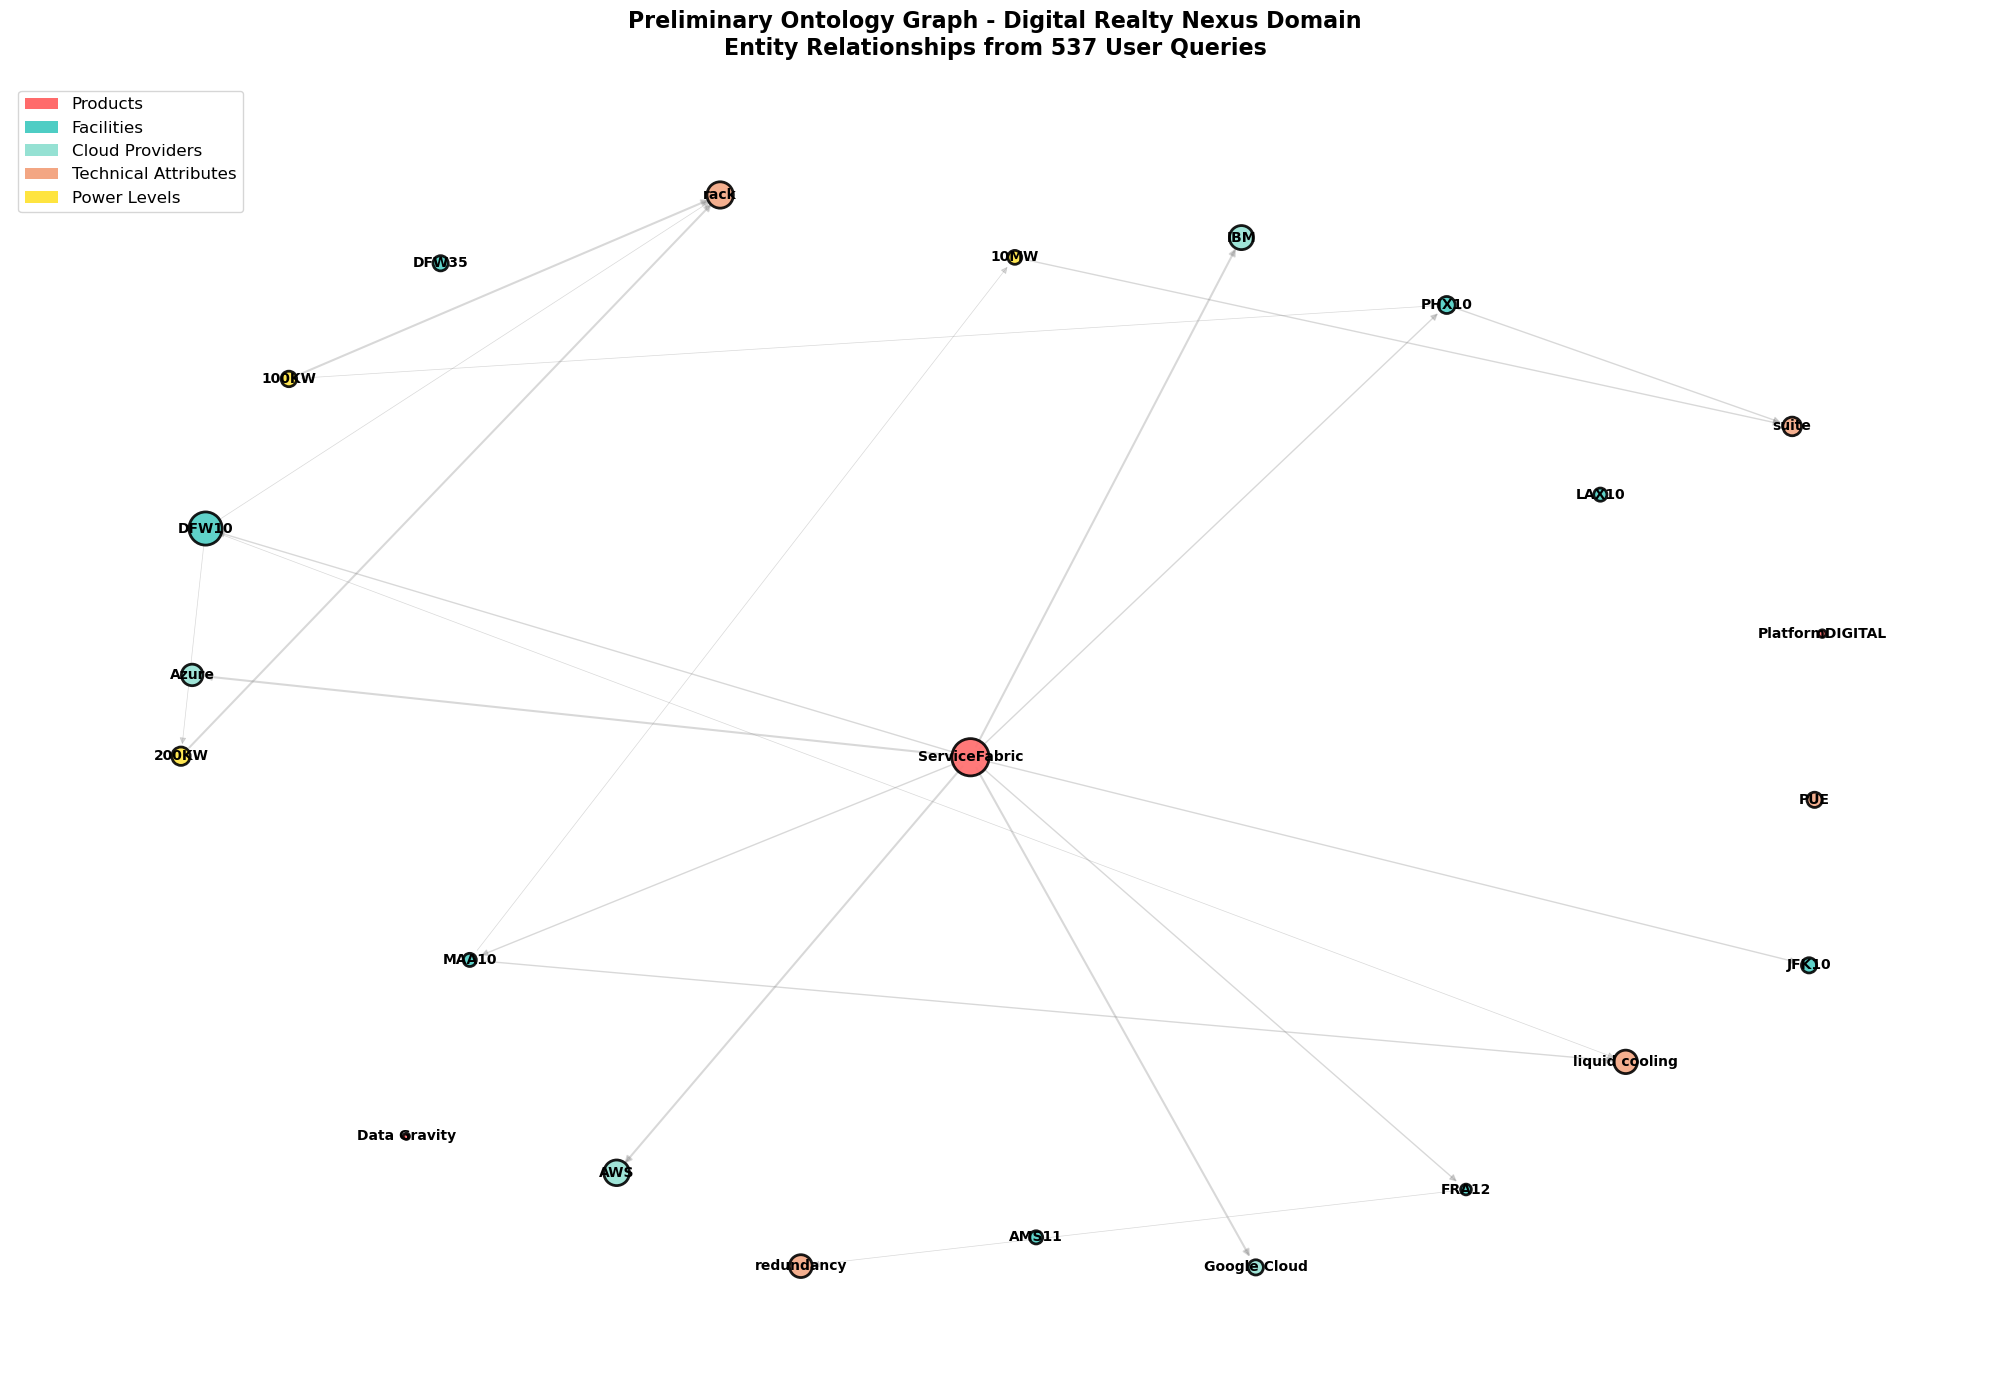


ONTOLOGY GRAPH STATISTICS

Nodes by category:
  Facility: 8 nodes
  Attribute: 5 nodes
  CSP: 4 nodes
  Product: 3 nodes
  Power: 3 nodes

Relationships by type:
  available_at: 5 edges
  has_attribute: 5 edges
  connects_to: 4 edges
  offers_capacity: 3 edges
  uses_infrastructure: 3 edges

Most connected entities (top 10):
  ServiceFabric (Product): 9 connections
  DFW10 (Facility): 4 connections
  PHX10 (Facility): 3 connections
  MAA10 (Facility): 3 connections
  rack (Attribute): 3 connections
  FRA12 (Facility): 2 connections
  liquid cooling (Attribute): 2 connections
  suite (Attribute): 2 connections
  200KW (Power): 2 connections
  100KW (Power): 2 connections

✅ Preliminary ontology complete!


In [57]:
# ===== PRELIMINARY ONTOLOGY GRAPH =====

print("="*80)
print("BUILDING PRELIMINARY ONTOLOGY GRAPH")
print("="*80)

import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# ===== ADD NODES WITH CATEGORIES AND SIZES =====

print("\nAdding nodes to graph...")

# Products (size based on mentions)
products_to_add = [
    ('ServiceFabric', 72),
    ('PlatformDIGITAL', 3),
    ('Data Gravity', 2)
]
for product, size in products_to_add:
    G.add_node(product, category='Product', size=size*10, color='#FF6B6B')

# Top Facilities (top 10 by mentions)
facilities_to_add = [
    ('DFW10', 19),
    ('PHX10', 5),
    ('DFW35', 4),
    ('JFK10', 4),
    ('MAA10', 3),
    ('LAX10', 3),
    ('AMS11', 3),
    ('FRA12', 2)
]
for facility, size in facilities_to_add:
    G.add_node(facility, category='Facility', size=size*30, color='#4ECDC4')

# Cloud Providers (top 4)
csps_to_add = [
    ('AWS', 17),
    ('IBM', 15),
    ('Azure', 12),
    ('Google Cloud', 6)
]
for csp, size in csps_to_add:
    G.add_node(csp, category='CSP', size=size*20, color='#95E1D3')

# Technical Attributes (top 5)
attributes_to_add = [
    ('liquid cooling', 19),
    ('rack', 24),
    ('suite', 12),
    ('redundancy', 18),
    ('PUE', 8)
]
for attr, size in attributes_to_add:
    G.add_node(attr, category='Attribute', size=size*15, color='#F3A683')

# Power Levels (representative)
power_to_add = [
    ('200KW', 7),
    ('100KW', 5),
    ('10MW', 4)
]
for power, size in power_to_add:
    G.add_node(power, category='Power', size=size*25, color='#FEE440')

print(f"✅ Added {G.number_of_nodes()} nodes")

# ===== ADD EDGES (RELATIONSHIPS) =====

print("\nAdding relationships (edges)...")

# Product → Facility (ServiceFabric availability queries)
sf_facilities = ['DFW10', 'PHX10', 'JFK10', 'FRA12', 'MAA10']
for facility in sf_facilities:
    if facility in G:
        G.add_edge('ServiceFabric', facility, relationship='available_at', weight=2)

# Product → CSP (connectivity)
sf_csps = ['AWS', 'Azure', 'IBM', 'Google Cloud']
for csp in sf_csps:
    if csp in G:
        G.add_edge('ServiceFabric', csp, relationship='connects_to', weight=3)

# Facility → Attribute (observed co-occurrences)
facility_attrs = [
    ('MAA10', 'liquid cooling', 2),
    ('PHX10', 'suite', 2),
    ('DFW10', 'liquid cooling', 1),
    ('DFW10', 'rack', 1),
    ('FRA12', 'redundancy', 1),
]
for facility, attr, weight in facility_attrs:
    if facility in G and attr in G:
        G.add_edge(facility, attr, relationship='has_attribute', weight=weight)

# Power → Attribute (infrastructure correlations)
power_attrs = [
    ('100KW', 'rack', 3),
    ('200KW', 'rack', 3),
    ('10MW', 'suite', 2)
]
for power, attr, weight in power_attrs:
    if power in G and attr in G:
        G.add_edge(power, attr, relationship='uses_infrastructure', weight=weight)

# Facility → Power (representative)
facility_power = [
    ('DFW10', '200KW'),
    ('PHX10', '100KW'),
    ('MAA10', '10MW')
]
for facility, power in facility_power:
    if facility in G and power in G:
        G.add_edge(facility, power, relationship='offers_capacity', weight=1)

print(f"✅ Added {G.number_of_edges()} edges")

# ===== VISUALIZE =====

print("\nGenerating visualization...")

plt.figure(figsize=(20, 14))

# Layout
pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Get node attributes
node_sizes = [G.nodes[node].get('size', 100) for node in G.nodes()]
node_colors = [G.nodes[node].get('color', '#gray') for node in G.nodes()]

# Draw nodes
nx.draw_networkx_nodes(G, pos, 
                       node_size=node_sizes,
                       node_color=node_colors,
                       alpha=0.9,
                       edgecolors='black',
                       linewidths=2)

# Draw edges with varying thickness
edge_weights = [G[u][v].get('weight', 1) for u, v in G.edges()]
nx.draw_networkx_edges(G, pos,
                       width=[w*0.5 for w in edge_weights],
                       alpha=0.3,
                       edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos,
                       font_size=10,
                       font_weight='bold',
                       font_family='sans-serif')

plt.title("Preliminary Ontology Graph - Digital Realty Nexus Domain\n"
          "Entity Relationships from 537 User Queries",
          fontsize=16, fontweight='bold', pad=20)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', label='Products'),
    Patch(facecolor='#4ECDC4', label='Facilities'),
    Patch(facecolor='#95E1D3', label='Cloud Providers'),
    Patch(facecolor='#F3A683', label='Technical Attributes'),
    Patch(facecolor='#FEE440', label='Power Levels')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=12)

plt.axis('off')
plt.tight_layout()

# Save to local directory (same as notebook)
plt.savefig('preliminary_ontology_graph.png', dpi=300, bbox_inches='tight')
print("✅ Graph saved to preliminary_ontology_graph.png")
plt.show()

# ===== ONTOLOGY STATISTICS =====

print("\n" + "="*80)
print("ONTOLOGY GRAPH STATISTICS")
print("="*80)

# Nodes by category
categories = {}
for node in G.nodes():
    cat = G.nodes[node].get('category', 'Unknown')
    categories[cat] = categories.get(cat, 0) + 1

print("\nNodes by category:")
for cat, count in sorted(categories.items(), key=lambda x: x[1], reverse=True):
    print(f"  {cat}: {count} nodes")

# Relationships by type
relationships = {}
for u, v in G.edges():
    rel = G[u][v].get('relationship', 'unknown')
    relationships[rel] = relationships.get(rel, 0) + 1

print("\nRelationships by type:")
for rel, count in sorted(relationships.items(), key=lambda x: x[1], reverse=True):
    print(f"  {rel}: {count} edges")

# Most connected nodes
degree_centrality = nx.degree_centrality(G)
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nMost connected entities (top 10):")
for node, centrality in top_nodes:
    degree = G.degree(node)
    category = G.nodes[node].get('category', 'Unknown')
    print(f"  {node} ({category}): {degree} connections")

print("\n✅ Preliminary ontology complete!")